In [1]:
import sys, argparse, numpy, math
import scipy.stats as scipystats
import matplotlib.pyplot as plt
import numpy as np
import re, os
%matplotlib inline

sys.path.append('/home/lethalfang/apps/seqc2/somaticseq/')
sys.path.append('/home/lethalfang/apps/seqc2/somaticseq/utilities')

import genomic_file_handlers as genome
from bedFileHandler import BedFile

reference_dir = '../../../../HCC1395/HighConfidenceCalls/truth_v1.1/'
armLoss = BedFile('{}/BED/germline_chromosome_arm_loss.bed'.format(reference_dir))

In [2]:
goldset_snv   = '{}/sSNV.MSDUKT.superSet.v1.2.vcf.gz'.format(reference_dir)
goldset_indel = '{}/sINDEL.MDKT.superSet.v1.2.vcf.gz'.format(reference_dir)
fai_file      = '/home/lethalfang/Documents/GRCh38/GRCh38.d1.vd1.fa.fai'
callable_loci = '/home/lethalfang/Documents/Bina/SMWG/HCC1395/HighConfidenceCalls/mergeBed.merge1000bpGaps.MajorityAlignersCallable.parameters02.bed'
ref_n         = '/home/lethalfang/Documents/Bina/SMWG/Manuscript_01_Files/REF_N.bed'

germline_vaf  = '/home/lethalfang/Documents/Bina/SMWG/2018_AMP/Tumor.Normal.germlineSnvPositions.vcf.gz'

In [3]:
def log2ratio_to_cn(log2_value):
    return 2 ** (log2_value + 1)

In [4]:
def closeEnough(copyNumber, value, percent):
    if copyNumber - copyNumber*percent <= value <= copyNumber + copyNumber*percent:
        return True
    else:
        return False

In [5]:
def contig2number(contig_i):
    return int( re.sub(r'chr', '', contig_i).replace('X', '23') )

contigLength = {}
with open(fai_file) as fn:
    line_i = fn.readline().rstrip()
    while line_i:
        item = line_i.split('\t')
        contigLength[ item[0] ] = int( item[1] )
        line_i = fn.readline().rstrip()

In [6]:
callableLoci = {}
with open(callable_loci) as fn:
    line_i = fn.readline().rstrip()
    while line_i:
        item = line_i.split('\t')
        contig_i, startPos, endPos = item[0], int(item[1]), int(item[2])
        
        if contig_i in callableLoci:
            callableLoci[contig_i].append( (startPos, endPos) )
        else:
            callableLoci[contig_i] = [ (startPos, endPos) ]
            
        line_i = fn.readline().rstrip()

In [7]:
refN = {}
with open(ref_n) as fn:
    line_i = fn.readline().rstrip()
    while line_i:
        item = line_i.split('\t')
        contig_i, startPos, endPos = item[0], int(item[1]), int(item[2])
        
        if contig_i in refN:
            refN[contig_i].append( (startPos, endPos) )
        else:
            refN[contig_i] = [ (startPos, endPos) ]
            
        line_i = fn.readline().rstrip()

In [8]:
with open('/home/lethalfang/Documents/Bina/SMWG/Manuscript_01_Files/ASCAT_FACETS_CNV/ascat_REF.bed') as ascat:
    
    line_i = ascat.readline().rstrip()
    line_i = ascat.readline().rstrip()
    
    as1 = open('/tmp/as1.bed', 'w')
    as2 = open('/tmp/as2.bed', 'w')
    as3 = open('/tmp/as3.bed', 'w')
    as4 = open('/tmp/as4.bed', 'w')
    as5 = open('/tmp/as5.bed', 'w')
    as6 = open('/tmp/as6.bed', 'w')
    as7 = open('/tmp/as7.bed', 'w')
    as8 = open('/tmp/as8.bed', 'w')

    while line_i:
        
        item = line_i.split('\t')
        
        contig_i = 'chr' + item[0]
        start_i  = int( item[1] )
        end_i    = int( item[2] )
        cp_i     = float( item[3] )
        
        if   closeEnough(1, cp_i, 0.1):
            as1.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(2, cp_i, 0.1):
            as2.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(3, cp_i, 0.1):
            as3.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(4, cp_i, 0.1):
            as4.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(5, cp_i, 0.1):
            as5.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(6, cp_i, 0.1):
            as6.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(7, cp_i, 0.1):
            as7.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(8, cp_i, 0.1):
            as8.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        
        line_i = ascat.readline().rstrip()
        
as1.close()
as2.close()
as3.close()
as4.close()
as5.close()
as6.close()
as7.close()
as8.close()

os.system('for file in /tmp/as*.bed; do mergeBed -i $file > /tmp/tmp.bed; mv /tmp/tmp.bed $file; done ')

ascat_cp1 = BedFile('/tmp/as1.bed')
ascat_cp2 = BedFile('/tmp/as2.bed')
ascat_cp3 = BedFile('/tmp/as3.bed')
ascat_cp4 = BedFile('/tmp/as4.bed')
ascat_cp5 = BedFile('/tmp/as5.bed')
ascat_cp6 = BedFile('/tmp/as6.bed')
ascat_cp7 = BedFile('/tmp/as7.bed')
ascat_cp8 = BedFile('/tmp/as8.bed')

In [9]:
snv_TVAFs = []

snv_hiconf        = []
snv_medconf       = []
snv_lowconf       = []
snv_unclassified  = []
snv_goldset       = []

snvArmLoss = []

with genome.open_textfile(goldset_snv) as vcfin:

    line_i = vcfin.readline().rstrip()

    while line_i.startswith('#'):
        line_i = vcfin.readline().rstrip()

    while line_i:

        vcf_i = genome.Vcf_line( line_i )

        snv_TVAFs.append( float(vcf_i.get_info_value('TVAF')) )
        snvArmLoss.append( armLoss.inRegion( vcf_i.chromosome, vcf_i.position ) )
        
        if re.search(r'HighConf', vcf_i.filters):
            snv_hiconf.append( True )
            snv_medconf.append( False )
            snv_lowconf.append( False )
            snv_unclassified.append( False )
            snv_goldset.append( True )
            
        elif re.search(r'MedConf', vcf_i.filters):
            snv_hiconf.append( False )
            snv_medconf.append( True )
            snv_lowconf.append( False )
            snv_unclassified.append( False )
            snv_goldset.append( True )

        elif re.search(r'LowConf', vcf_i.filters):
            snv_hiconf.append( False )
            snv_medconf.append( False )
            snv_lowconf.append( True )
            snv_unclassified.append( False )
            snv_goldset.append( False )

        elif re.search(r'Unclassified', vcf_i.filters):
            snv_hiconf.append(  False )
            snv_medconf.append( False )
            snv_lowconf.append( False )
            snv_unclassified.append( True )
            snv_goldset.append( False )

        line_i = vcfin.readline().rstrip()

In [10]:
snv_TVAFs = np.array(snv_TVAFs)

snv_hiconf       = np.array(snv_hiconf, dtype=bool)
snv_medconf      = np.array(snv_medconf, dtype=bool)
snv_goldset      = np.array(snv_goldset, dtype=bool)
snv_lowconf      = np.array(snv_lowconf, dtype=bool)
snv_unclassified = np.array(snv_unclassified, dtype=bool)

snvArmLoss    = np.array(snvArmLoss, dtype=bool)
snvNotArmLoss = np.invert(snvArmLoss)

In [11]:
is_cp1 = []
is_cp2 = []
is_cp3 = []
is_cp4 = []
is_cp5 = []
is_cp6 = []
is_cp7 = []
is_cp8 = []

with genome.open_textfile(goldset_snv) as vcfin:

    line_i = vcfin.readline().rstrip()

    while line_i.startswith('#'):
        line_i = vcfin.readline().rstrip()

    while line_i:

        vcf_i = genome.Vcf_line( line_i )
        
        isCp1 = ascat_cp1.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp2 = ascat_cp2.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp3 = ascat_cp3.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp4 = ascat_cp4.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp5 = ascat_cp5.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp6 = ascat_cp6.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp7 = ascat_cp7.inRegion(vcf_i.chromosome, vcf_i.position, False)
        isCp8 = ascat_cp8.inRegion(vcf_i.chromosome, vcf_i.position, False)
        
        is_cp1.append( isCp1 )
        is_cp2.append( isCp2 )
        is_cp3.append( isCp3 )
        is_cp4.append( isCp4 )
        is_cp5.append( isCp5 )
        is_cp6.append( isCp6 )
        is_cp7.append( isCp7 )
        is_cp8.append( isCp8 )

        line_i = vcfin.readline().rstrip()

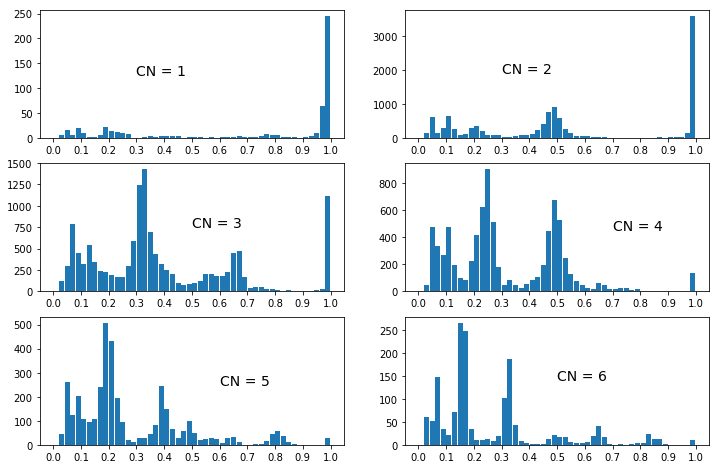

In [12]:
_ = plt.figure( figsize=(12,8))

nbins=51

ax1 = plt.subplot(321)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp1), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.3, 125, 'CN = 1', fontsize=14)

ax2 = plt.subplot(322, sharex=ax1)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp2), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.3, 1900, 'CN = 2', fontsize=14)

ax3 = plt.subplot(323)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp3), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.5, 750, 'CN = 3', fontsize=14)

ax4 = plt.subplot(324, sharex=ax3)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp4), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.7, 450, 'CN = 4', fontsize=14)

ax5 = plt.subplot(325)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp5), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.6, 250, 'CN = 5', fontsize=14)

ax5 = plt.subplot(326)
_ = plt.hist( (snv_TVAFs[np.all((snv_goldset, snvNotArmLoss, is_cp6), axis=0)]), bins=np.linspace(0,1,51), rwidth=0.9 )
_ = plt.xticks( np.linspace(0,1,11) )
_ = plt.text(0.5, 140, 'CN = 6', fontsize=14)

plt.savefig('../Extended_Data_Figures/Extended_Data_Fig_08b_VAF_of_somatic_mutations_at_different_CNs.pdf', bbox_inches='tight')

chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, 

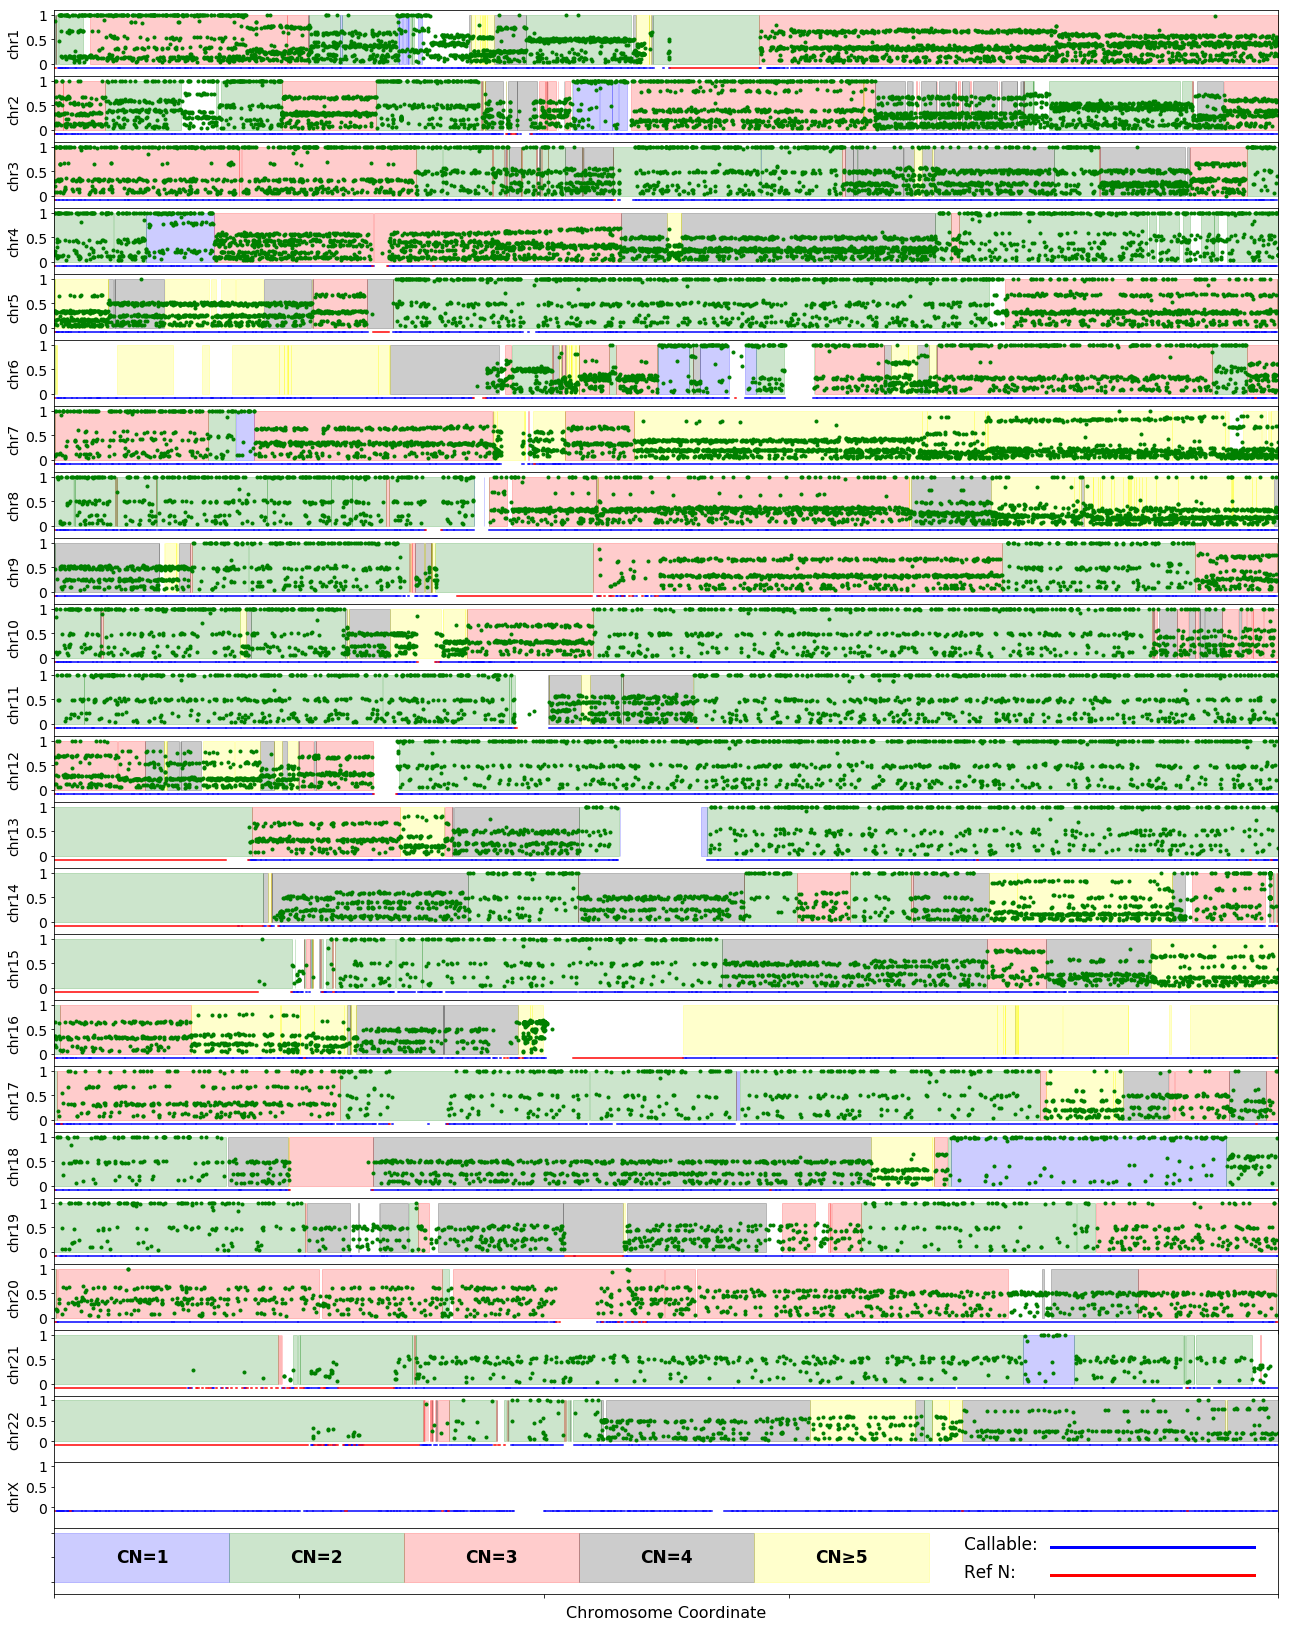

In [13]:
# Somatic VAF along the tumor chromosomes
delta = 1/24

with genome.open_textfile(goldset_snv) as vcfin:

    line_i = vcfin.readline().rstrip()

    while line_i.startswith('#'):
        line_i = vcfin.readline().rstrip()

    
    position = []
    vaf      = []
    contig_i = 'chr1'
    
    fig = plt.figure(figsize=(17,22))
    
    while line_i:

        vcf_i      = genome.Vcf_line( line_i )
        contig_j   = vcf_i.chromosome
        position_j = vcf_i.position
        
        if ( not armLoss.inRegion( contig_j, position_j ) ) and \
        ('HighConf' in vcf_i.filters or 'MedConf' in vcf_i.filters):
            
            if contig_j == contig_i:
                
                position.append(position_j)
                vaf.append( float(vcf_i.get_info_value('TVAF')) )
                
            else:
                
                nth_figure = contig2number(contig_i) # done
                
                ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.25,1.1))
                
                ax1 = plt.plot(np.array(position) / contigLength[contig_i], vaf, linestyle='none', marker='.', color='green')
                ax1 = plt.ylabel(contig_i, fontsize=14)
                ax1 = plt.xlim(0,1)
                ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
                ax1 = plt.gca().axes.xaxis.set_ticklabels([])

                #ax1 = plt.legend(('chr{}'.format(nth_figure),), loc='upper left', fontsize=14)
                
                if contig_i in ascat_cp1.bedRegions:
                    for region_i in ascat_cp1.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=0.2)
                
                if contig_i in ascat_cp2.bedRegions:
                    for region_i in ascat_cp2.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=0.2)

                if contig_i in ascat_cp3.bedRegions:
                    for region_i in ascat_cp3.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=0.2)

                if contig_i in ascat_cp4.bedRegions:
                    for region_i in ascat_cp4.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=0.2)

                if contig_i in ascat_cp5.bedRegions:
                    for region_i in ascat_cp5.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)
                
                if contig_i in ascat_cp6.bedRegions:
                    for region_i in ascat_cp6.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

                if contig_i in ascat_cp7.bedRegions:
                    for region_i in ascat_cp7.bedRegions[contig_i]:
                        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

                lociList = []
                for loci_i in callableLoci[contig_i]:
                    lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                    lociList.append( (-0.1, -0.1) )
                ax1 = plt.plot( *lociList, color='blue' )
                
                refNList = []
                for loci_i in refN[contig_i]:
                    refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                    refNList.append( (-0.1, -0.1) )
                ax1 = plt.plot( *refNList, color='red' )
                
                print(contig_i, end=', ')
                
                contig_i = contig_j
                position = []
                vaf      = []
                
                # Start gathering
                position.append(position_j)
                vaf.append( float(vcf_i.get_info_value('TVAF')) )
                
        line_i = vcfin.readline().rstrip()
    

nth_figure = contig2number(contig_i)
                        
ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.5,1.1) )

ax1 = plt.plot(np.array(position) / contigLength[contig_i], vaf, linestyle='none', marker='.', color='green')


if contig_i in ascat_cp1.bedRegions:
    for region_i in ascat_cp1.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=0.2)

if contig_i in ascat_cp2.bedRegions:
    for region_i in ascat_cp2.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=0.2)

if contig_i in ascat_cp3.bedRegions:
    for region_i in ascat_cp3.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=0.2)

if contig_i in ascat_cp4.bedRegions:
    for region_i in ascat_cp4.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=0.2)

if contig_i in ascat_cp5.bedRegions:
    for region_i in ascat_cp5.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)
        
if contig_i in ascat_cp6.bedRegions:
    for region_i in ascat_cp6.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

if contig_i in ascat_cp7.bedRegions:
    for region_i in ascat_cp7.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

lociList = []
for loci_i in callableLoci[contig_i]:
    lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    lociList.append( (-0.1, -0.1) )
ax1 = plt.plot( *lociList, color='blue' )


refNList = []
for loci_i in refN[contig_i]:
    refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    refNList.append( (-0.1, -0.1) )
ax1 = plt.plot( *refNList, color='red' )

print(contig_i, end=', ')

ax1 = plt.xlim(0,1)
ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
ax1 = plt.ylabel(contig_i,      fontsize=14)
ax1 = plt.gca().axes.xaxis.set_ticklabels([])


### CHROM X:
contig_i = 'chrX'
nth_figure = contig2number(contig_i)
                        
ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.5,1.1) )

if contig_i in ascat_cp1.bedRegions:
    for region_i in ascat_cp1.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=0.2)

if contig_i in ascat_cp2.bedRegions:
    for region_i in ascat_cp2.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=0.2)

if contig_i in ascat_cp3.bedRegions:
    for region_i in ascat_cp3.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=0.2)

if contig_i in ascat_cp4.bedRegions:
    for region_i in ascat_cp4.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=0.2)

if contig_i in ascat_cp5.bedRegions:
    for region_i in ascat_cp5.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)
        
if contig_i in ascat_cp6.bedRegions:
    for region_i in ascat_cp6.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

if contig_i in ascat_cp7.bedRegions:
    for region_i in ascat_cp7.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=0.2)

lociList = []
for loci_i in callableLoci[contig_i]:
    lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    lociList.append( (-0.1, -0.1) )
ax1 = plt.plot( *lociList, color='blue' )


refNList = []
for loci_i in refN[contig_i]:
    refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    refNList.append( (-0.1, -0.1) )
ax1 = plt.plot( *refNList, color='red' )

print(contig_i, end=', ')

ax1 = plt.xlim(0,1)
ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
ax1 = plt.ylabel(contig_i,      fontsize=14)
ax1 = plt.gca().axes.xaxis.set_ticklabels([])



## LEGEND
i = nth_figure+1
ax1 = fig.add_axes([0, 1-i*delta, 1, delta], ylim=(-0.25,1.1) )

grid_secs = 7
plt.fill_between((0/grid_secs, 1/grid_secs), 0, 1, color='blue',   alpha=0.2)
plt.fill_between((1/grid_secs, 2/grid_secs), 0, 1, color='green',  alpha=0.2)
plt.fill_between((2/grid_secs, 3/grid_secs), 0, 1, color='red',    alpha=0.2)
plt.fill_between((3/grid_secs, 4/grid_secs), 0, 1, color='black',  alpha=0.2)
plt.fill_between((4/grid_secs, 5/grid_secs), 0, 1, color='yellow', alpha=0.2)

plt.text(0.35/grid_secs, 0.4, 'CN=1', fontsize=17, fontweight='bold')
plt.text(1.35/grid_secs, 0.4, 'CN=2', fontsize=17, fontweight='bold')
plt.text(2.35/grid_secs, 0.4, 'CN=3', fontsize=17, fontweight='bold')
plt.text(3.35/grid_secs, 0.4, 'CN=4', fontsize=17, fontweight='bold')
plt.text(4.35/grid_secs, 0.4, 'CN≥5', fontsize=17, fontweight='bold')

plt.text(5.2/grid_secs, 0.66, 'Callable:', fontsize=17)
plt.text(5.2/grid_secs, 0.10, 'Ref N:',    fontsize=17)

plt.plot( (5.7/grid_secs, 0.98), (0.7, 0.7),   color='blue', linewidth=3)
plt.plot( (5.7/grid_secs, 0.98), (0.14, 0.14), color='red' , linewidth=3)

ax1 = plt.xlabel('Chromosome Coordinate', fontsize=16)

ax1 = plt.xlim(0,1)

ax1 = plt.gca().axes.yaxis.set_ticklabels([])
ax1 = plt.gca().axes.xaxis.set_ticklabels([])


ax1 = plt.savefig('../Extended_Data_Figures/Extended_Data_Fig_07c_somatic_VAF_chroms.pdf', bbox_inches="tight")

chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, 

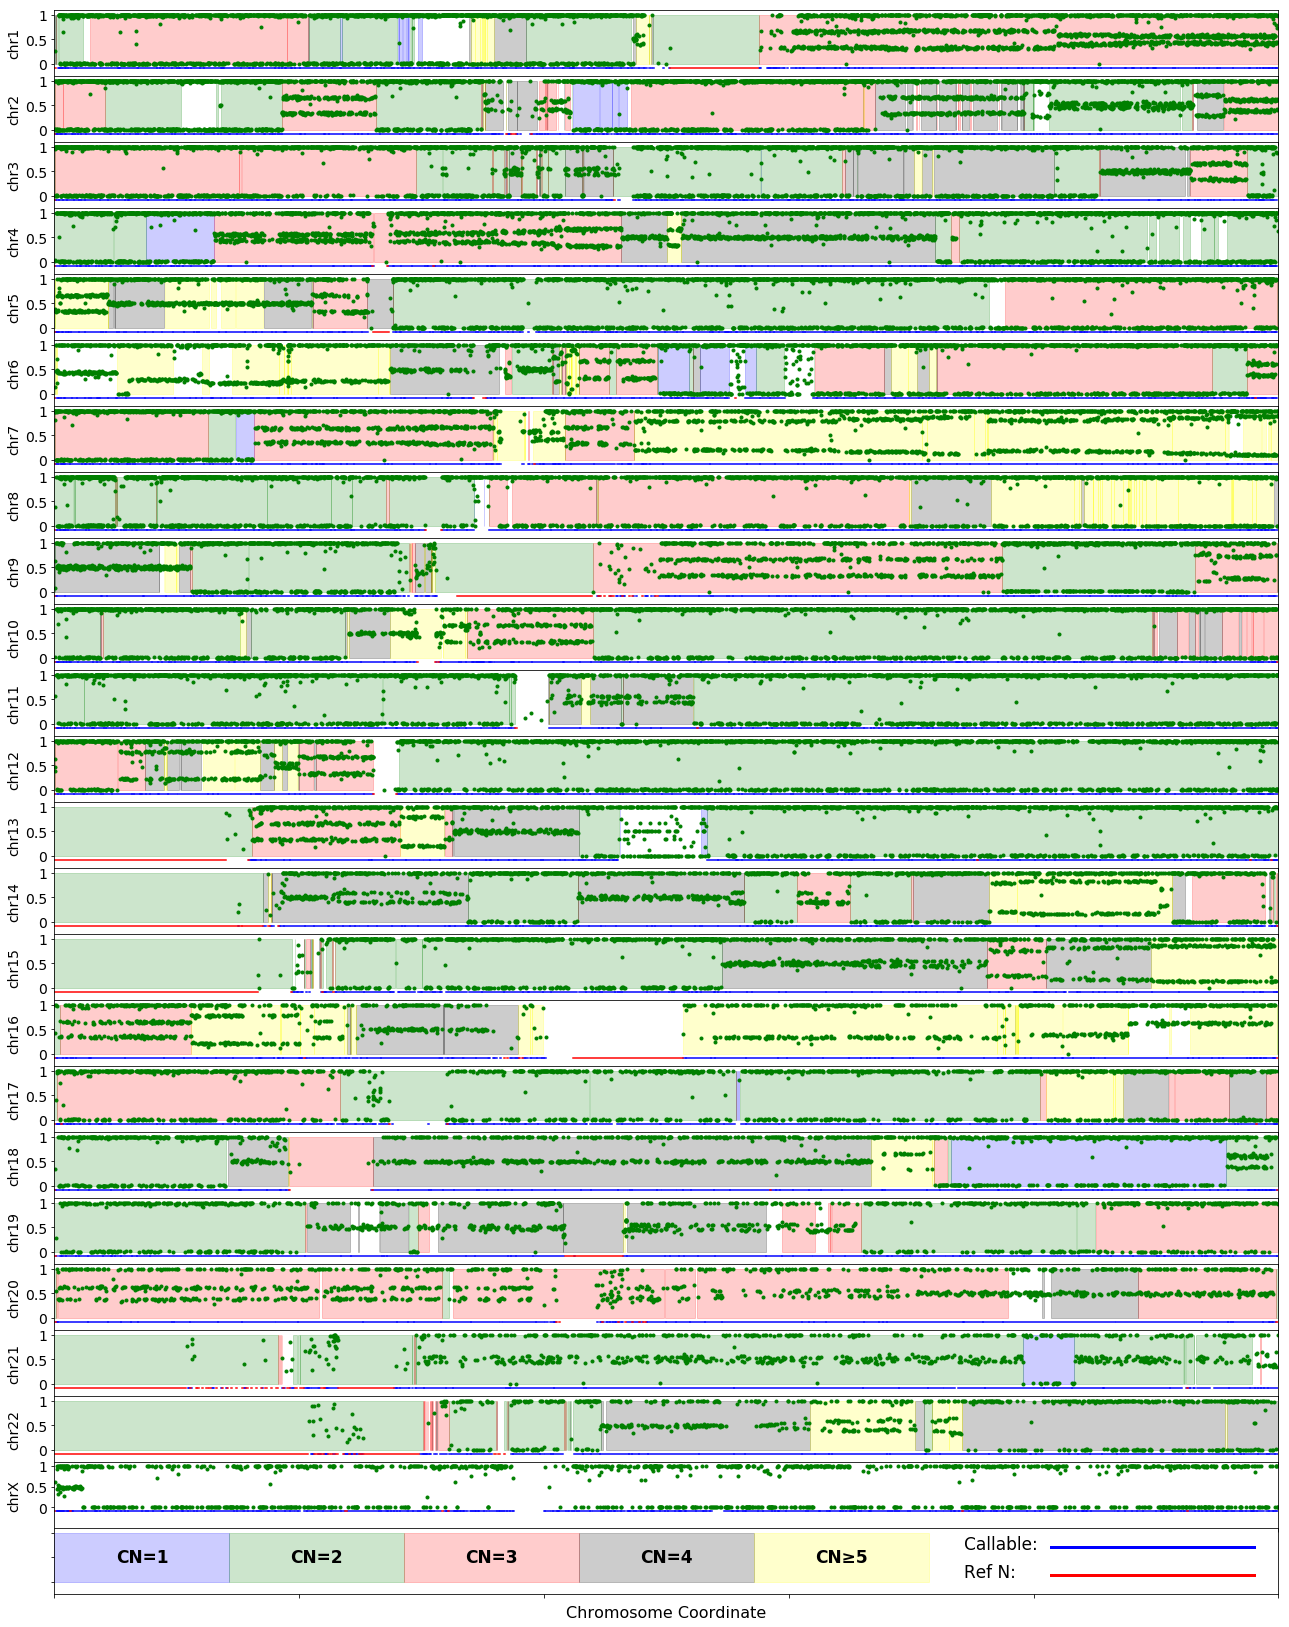

In [14]:
# Germline VAF along the tumor chromosomes

VAF_STRING_TO_GRAB = 'bwaTVAF'  # Germline variant VAF in tumor

delta = 1/24
shade_start = 0.2
shade_increment = 0.0
skip_number = 50

with genome.open_textfile(germline_vaf) as vcfin:

    line_i = vcfin.readline().rstrip()

    while line_i.startswith('#'):
        line_i = vcfin.readline().rstrip()

    
    position = []
    vaf      = []
    contig_i = 'chr1'
    
    fig = plt.figure(figsize=(17,22))
    
    while line_i:

        item = line_i.split('\t')
        contig_j   = item[0]
        position_j = int( item[1] )
        vcf_i = genome.Vcf_line(line_i)
        
        if contig_j == contig_i:
            
            position.append(position_j)
            vaf.append( float(vcf_i.get_info_value(VAF_STRING_TO_GRAB) ) )
            
        else:
            
            nth_figure = contig2number(contig_i) # done
            
            ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.25,1.1))
            
            ax1 = plt.plot(np.array(position)[::skip_number] / contigLength[contig_i], vaf[::skip_number], linestyle='none', marker='.', color='green')
            ax1 = plt.ylabel(contig_i, fontsize=14)
            ax1 = plt.xlim(0,1)
            ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
            ax1 = plt.gca().axes.xaxis.set_ticklabels([])
            
            if contig_i in ascat_cp1.bedRegions:
                for region_i in ascat_cp1.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=shade_start)
            
            if contig_i in ascat_cp2.bedRegions:
                for region_i in ascat_cp2.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=shade_start+1*shade_increment)

            if contig_i in ascat_cp3.bedRegions:
                for region_i in ascat_cp3.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=shade_start+2*shade_increment)

            if contig_i in ascat_cp4.bedRegions:
                for region_i in ascat_cp4.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=shade_start+3*shade_increment)

            if contig_i in ascat_cp5.bedRegions:
                for region_i in ascat_cp5.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)
            
            if contig_i in ascat_cp6.bedRegions:
                for region_i in ascat_cp6.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)

            if contig_i in ascat_cp7.bedRegions:
                for region_i in ascat_cp7.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)

            lociList = []
            for loci_i in callableLoci[contig_i]:
                lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                lociList.append( (-0.1, -0.1) )
            ax1 = plt.plot( *lociList, color='blue' )
            
            refNList = []
            for loci_i in refN[contig_i]:
                refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                refNList.append( (-0.1, -0.1) )
            ax1 = plt.plot( *refNList, color='red' )
            
            print(contig_i, end=', ')
            
            contig_i = contig_j
            position = []
            vaf      = []
            
            # Start gathering
            position.append(position_j)
            vaf.append( float(vcf_i.get_info_value(VAF_STRING_TO_GRAB) ) )
                
        line_i = vcfin.readline().rstrip()
    

nth_figure = contig2number(contig_i)
                        
ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.5,1.1) )

ax1 = plt.plot(np.array(position)[::skip_number] / contigLength[contig_i], vaf[::skip_number], linestyle='none', marker='.', color='green')

if contig_i in ascat_cp1.bedRegions:
    for region_i in ascat_cp1.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=shade_start)

if contig_i in ascat_cp2.bedRegions:
    for region_i in ascat_cp2.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=shade_start+1*shade_increment)

if contig_i in ascat_cp3.bedRegions:
    for region_i in ascat_cp3.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=shade_start+2*shade_increment)

if contig_i in ascat_cp4.bedRegions:
    for region_i in ascat_cp4.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=shade_start+3*shade_increment)

if contig_i in ascat_cp5.bedRegions:
    for region_i in ascat_cp5.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)
        
if contig_i in ascat_cp6.bedRegions:
    for region_i in ascat_cp6.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)

if contig_i in ascat_cp7.bedRegions:
    for region_i in ascat_cp7.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)

lociList = []
for loci_i in callableLoci[contig_i]:
    lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    lociList.append( (-0.1, -0.1) )
ax1 = plt.plot( *lociList, color='blue' )


refNList = []
for loci_i in refN[contig_i]:
    refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    refNList.append( (-0.1, -0.1) )
ax1 = plt.plot( *refNList, color='red' )

print(contig_i, end=', ')

ax1 = plt.xlim(0,1)
ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
ax1 = plt.ylabel(contig_i, fontsize=14)
ax1 = plt.gca().axes.xaxis.set_ticklabels([])


i = nth_figure+1
ax1 = fig.add_axes([0, 1-i*delta, 1, delta], ylim=(-0.25,1.1) )

grid_secs = 7
plt.fill_between((0/grid_secs, 1/grid_secs), 0, 1, color='blue', alpha=shade_start)
plt.fill_between((1/grid_secs, 2/grid_secs), 0, 1, color='green', alpha=shade_start+1*shade_increment)
plt.fill_between((2/grid_secs, 3/grid_secs), 0, 1, color='red', alpha=shade_start+2*shade_increment)
plt.fill_between((3/grid_secs, 4/grid_secs), 0, 1, color='black', alpha=shade_start+3*shade_increment)
plt.fill_between((4/grid_secs, 5/grid_secs), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)


plt.text(0.35/grid_secs, 0.4, 'CN=1', fontsize=17, fontweight='bold')
plt.text(1.35/grid_secs, 0.4, 'CN=2', fontsize=17, fontweight='bold')
plt.text(2.35/grid_secs, 0.4, 'CN=3', fontsize=17, fontweight='bold')
plt.text(3.35/grid_secs, 0.4, 'CN=4', fontsize=17, fontweight='bold')
plt.text(4.35/grid_secs, 0.4, 'CN≥5', fontsize=17, fontweight='bold')

plt.text(5.2/grid_secs, 0.66, 'Callable:', fontsize=17)
plt.text(5.2/grid_secs, 0.10, 'Ref N:',    fontsize=17)

plt.plot( (5.7/grid_secs, 0.98), (0.7, 0.7),   color='blue', linewidth=3)
plt.plot( (5.7/grid_secs, 0.98), (0.14, 0.14), color='red' , linewidth=3)

ax1 = plt.xlabel('Chromosome Coordinate', fontsize=16)

ax1 = plt.xlim(0,1)

ax1 = plt.gca().axes.yaxis.set_ticklabels([])
ax1 = plt.gca().axes.xaxis.set_ticklabels([])

ax1 = plt.savefig('../Extended_Data_Figures/Extended_Data_Fig_07b_germline_VAF_on_tumor_chroms.pdf', bbox_inches="tight")

In [15]:
with open('/home/lethalfang/Documents/Bina/SMWG/Manuscript_01_Files/microarrayCNV/HCC1395BL/HCC1395BL/segments2.txt') as g_affy:
    
    line_i = g_affy.readline().rstrip()
    line_i = g_affy.readline().rstrip()
    
    g_affy1 = open('/tmp/g_affy1.bed', 'w')
    g_affy2 = open('/tmp/g_affy2.bed', 'w')
    g_affy3 = open('/tmp/g_affy3.bed', 'w')
    g_affy4 = open('/tmp/g_affy4.bed', 'w')
    g_affy5 = open('/tmp/g_affy5.bed', 'w')
    g_affy6 = open('/tmp/g_affy6.bed', 'w')
    g_affy7 = open('/tmp/g_affy7.bed', 'w')
    g_affy8 = open('/tmp/g_affy8.bed', 'w')

    while line_i:
        
        item = line_i.split('\t')
        
        contig_i  = item[0]
        start_i   = int( item[1] )
        end_i     = int( item[2] )
        log2Ratio = float( item[4] )
        cp_i      = log2ratio_to_cn(log2Ratio)
        
        if   closeEnough(1, cp_i, 0.15):
            g_affy1.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(2, cp_i, 0.15):
            g_affy2.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(3, cp_i, 0.15):
            g_affy3.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(4, cp_i, 0.15):
            g_affy4.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(5, cp_i, 0.15):
            g_affy5.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(6, cp_i, 0.15):
            g_affy6.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(7, cp_i, 0.15):
            g_affy7.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        elif closeEnough(8, cp_i, 0.15):
            g_affy8.write('{}\t{}\t{}\t{}\n'.format(contig_i, start_i, end_i+1, cp_i))
        
        line_i = g_affy.readline().rstrip()
        
g_affy1.close()
g_affy2.close()
g_affy3.close()
g_affy4.close()
g_affy5.close()
g_affy6.close()
g_affy7.close()
g_affy8.close()

os.system('for file in /tmp/g_affy*.bed; do mergeBed -d 10000 -i $file > /tmp/tmp.bed; mv /tmp/tmp.bed $file; done')
os.system('cat /tmp/g_affy[5-8].bed | ../../WorkGen/somaticseq/utilities/vcfsorter.pl ../../../GRCh38/GRCh38.d1.vd1.dict - | mergeBed -d 10000 -i stdin > /tmp/g_affy5-8.bed')

g_affy_cp1 = BedFile('/tmp/g_affy1.bed')
g_affy_cp2 = BedFile('/tmp/g_affy2.bed')
g_affy_cp3 = BedFile('/tmp/g_affy3.bed')
g_affy_cp4 = BedFile('/tmp/g_affy4.bed')
g_affy_cp5 = BedFile('/tmp/g_affy5.bed')
g_affy_cp6 = BedFile('/tmp/g_affy6.bed')
g_affy_cp7 = BedFile('/tmp/g_affy7.bed')
g_affy_cp8 = BedFile('/tmp/g_affy8.bed')
g_affy_ge5 = BedFile('/tmp/g_affy5-8.bed')

chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr8, chr9, chr10, chr11, chr12, chr13, chr14, chr15, chr16, chr17, chr18, chr19, chr20, chr21, chr22, chrX, 

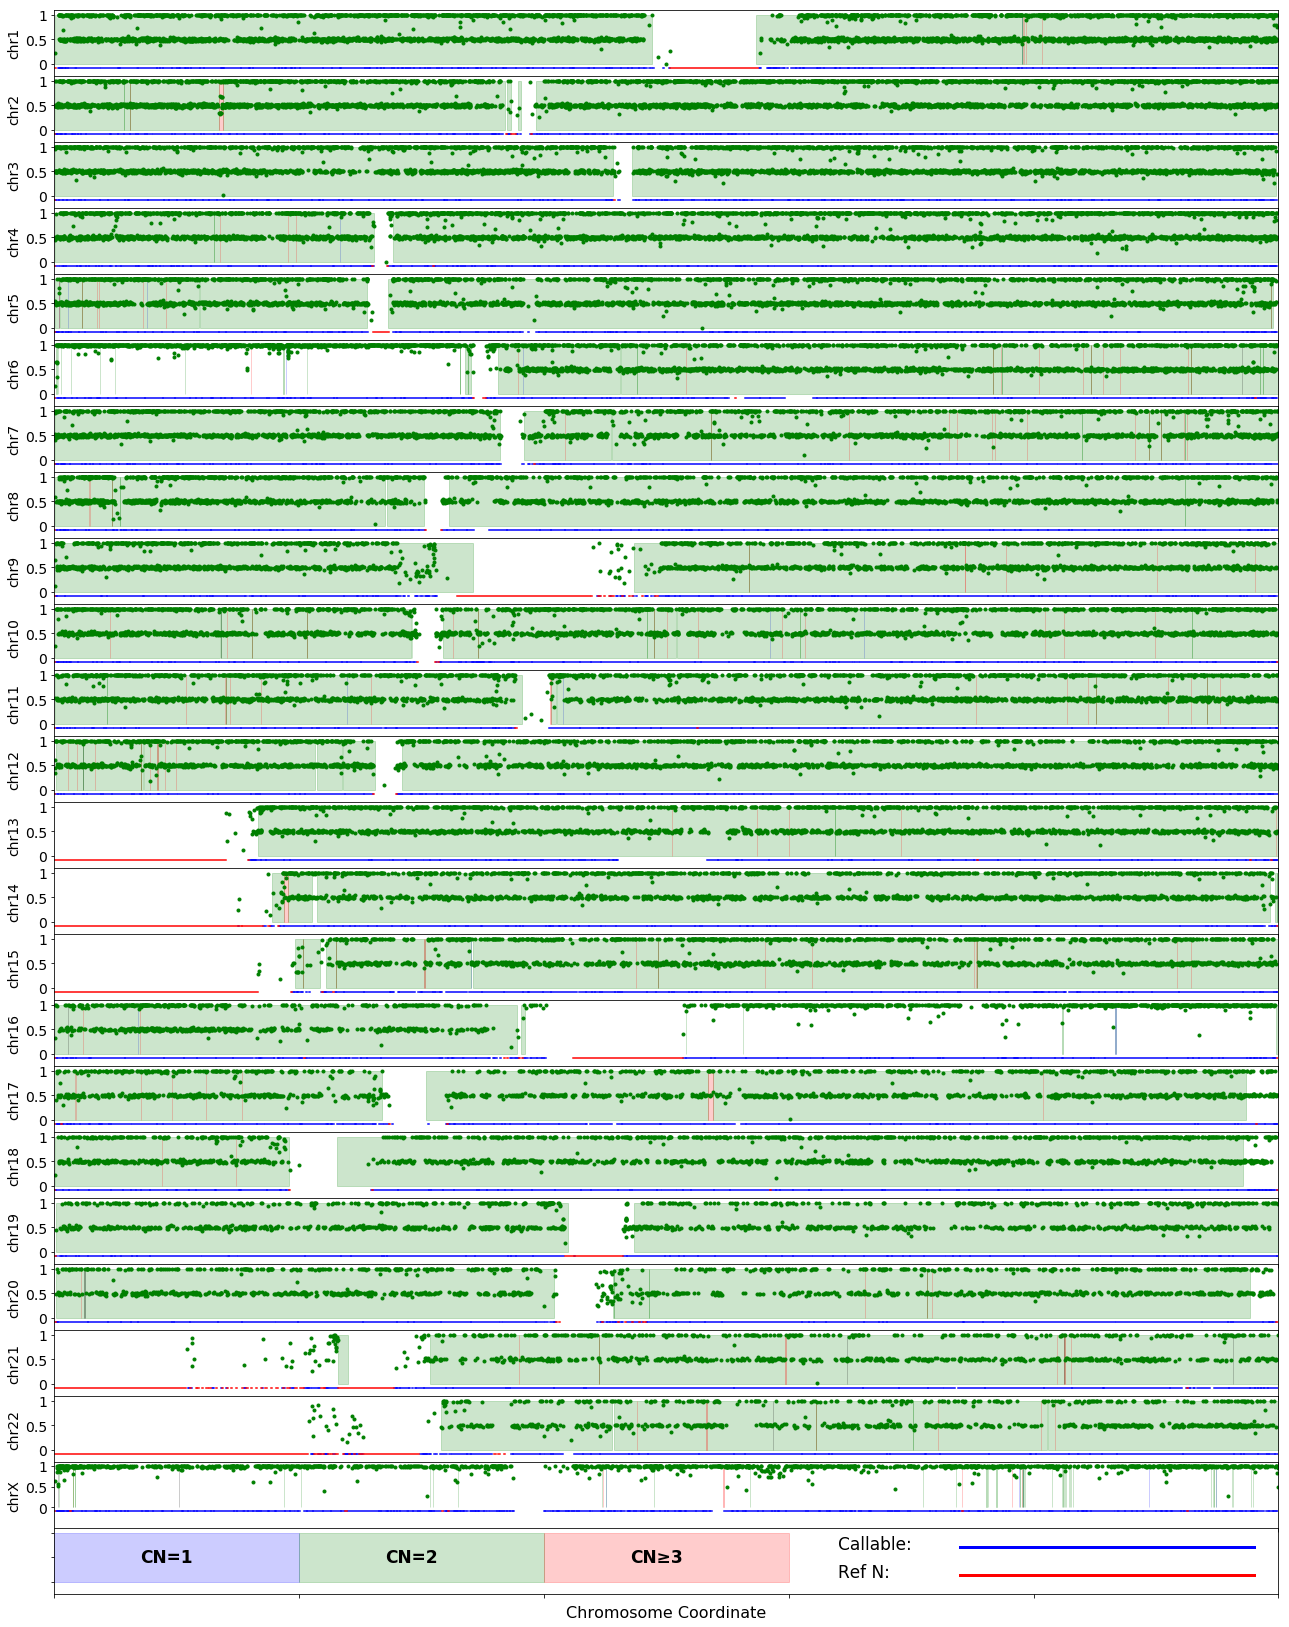

In [16]:
# Germline VAF along the normal chromosomes

VAF_STRING_TO_GRAB = 'bwaNVAF'  # Germline variant VAF in Normal

delta = 1/24
shade_start = 0.2 #0.08
shade_increment = 0 #0.15
skip_number = 50

with genome.open_textfile(germline_vaf) as vcfin:

    line_i = vcfin.readline().rstrip()

    while line_i.startswith('#'):
        line_i = vcfin.readline().rstrip()

    
    position = []
    vaf      = []
    contig_i = 'chr1'
    
    fig = plt.figure(figsize=(17,22))
    
    while line_i:

        item = line_i.split('\t')
        contig_j   = item[0]
        position_j = int( item[1] )
        vcf_i = genome.Vcf_line(line_i)
        
        if contig_j == contig_i:
            
            position.append(position_j)
            vaf.append( float(vcf_i.get_info_value(VAF_STRING_TO_GRAB) ) )
            
        else:
            
            nth_figure = contig2number(contig_i) # done
            
            ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.25,1.1))
            
            ax1 = plt.plot(np.array(position)[::skip_number] / contigLength[contig_i], vaf[::skip_number], linestyle='none', marker='.', color='green')
            ax1 = plt.ylabel(contig_i, fontsize=14)
            ax1 = plt.xlim(0,1)
            ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
            ax1 = plt.gca().axes.xaxis.set_ticklabels([])
            
            if contig_i in g_affy_cp1.bedRegions:
                for region_i in g_affy_cp1.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=shade_start)
            
            if contig_i in g_affy_cp2.bedRegions:
                for region_i in g_affy_cp2.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=shade_start+1*shade_increment)

            if contig_i in g_affy_cp3.bedRegions:
                for region_i in g_affy_cp3.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=shade_start+2*shade_increment)

            if contig_i in g_affy_cp4.bedRegions:
                for region_i in g_affy_cp4.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=shade_start+3*shade_increment)

            if contig_i in g_affy_cp5.bedRegions:
                for region_i in g_affy_cp5.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)
            
            if contig_i in g_affy_cp6.bedRegions:
                for region_i in g_affy_cp6.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+5*shade_increment)

            if contig_i in g_affy_cp7.bedRegions:
                for region_i in g_affy_cp7.bedRegions[contig_i]:
                    plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+6*shade_increment)

            lociList = []
            for loci_i in callableLoci[contig_i]:
                lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                lociList.append( (-0.1, -0.1) )
            ax1 = plt.plot( *lociList, color='blue' )
            
            refNList = []
            for loci_i in refN[contig_i]:
                refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
                refNList.append( (-0.1, -0.1) )
            ax1 = plt.plot( *refNList, color='red' )
            
            print(contig_i, end=', ')
            
            contig_i = contig_j
            position = []
            vaf      = []
            
            # Start gathering
            position.append(position_j)
            vaf.append( float(vcf_i.get_info_value(VAF_STRING_TO_GRAB) ) )
                
        line_i = vcfin.readline().rstrip()
    

nth_figure = contig2number(contig_i)
                        
ax1 = fig.add_axes([0, 1-nth_figure*delta, 1, delta], ylim=(-0.5,1.1) )

ax1 = plt.plot(np.array(position)[::skip_number] / contigLength[contig_i], vaf[::skip_number], linestyle='none', marker='.', color='green')


if contig_i in g_affy_cp1.bedRegions:
    for region_i in g_affy_cp1.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='blue', alpha=shade_start)

if contig_i in g_affy_cp2.bedRegions:
    for region_i in g_affy_cp2.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='green', alpha=shade_start+1*shade_increment)

if contig_i in g_affy_cp3.bedRegions:
    for region_i in g_affy_cp3.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='red', alpha=shade_start+2*shade_increment)

if contig_i in g_affy_cp4.bedRegions:
    for region_i in g_affy_cp4.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='black', alpha=shade_start+3*shade_increment)

if contig_i in g_affy_cp5.bedRegions:
    for region_i in g_affy_cp5.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+4*shade_increment)
        
if contig_i in g_affy_cp6.bedRegions:
    for region_i in g_affy_cp6.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+5*shade_increment)

if contig_i in g_affy_cp7.bedRegions:
    for region_i in g_affy_cp7.bedRegions[contig_i]:
        plt.fill_between((region_i[0]/contigLength[contig_i], region_i[1]/contigLength[contig_i]), 0, 1, color='yellow', alpha=shade_start+6*shade_increment)

lociList = []
for loci_i in callableLoci[contig_i]:
    lociList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    lociList.append( (-0.1, -0.1) )
ax1 = plt.plot( *lociList, color='blue' )


refNList = []
for loci_i in refN[contig_i]:
    refNList.append( (loci_i[0]/contigLength[contig_i], loci_i[1]/contigLength[contig_i]) )
    refNList.append( (-0.1, -0.1) )
ax1 = plt.plot( *refNList, color='red' )

print(contig_i, end=', ')

ax1 = plt.xlim(0,1)
ax1 = plt.yticks((0, 0.5, 1), (0, 0.5, 1), fontsize=14)
ax1 = plt.ylabel(contig_i, fontsize=14)
ax1 = plt.gca().axes.xaxis.set_ticklabels([])



i = nth_figure+1
ax1 = fig.add_axes([0, 1-i*delta, 1, delta], ylim=(-0.25,1.1) )

grid_secs = 5
plt.fill_between((0/grid_secs, 1/grid_secs), 0, 1, color='blue', alpha=shade_start)
plt.fill_between((1/grid_secs, 2/grid_secs), 0, 1, color='green', alpha=shade_start+1*shade_increment)
plt.fill_between((2/grid_secs, 3/grid_secs), 0, 1, color='red', alpha=shade_start+2*shade_increment)

plt.text(0.35/grid_secs, 0.4, 'CN=1', fontsize=17, fontweight='bold')
plt.text(1.35/grid_secs, 0.4, 'CN=2', fontsize=17, fontweight='bold')
plt.text(2.35/grid_secs, 0.4, 'CN≥3', fontsize=17, fontweight='bold')

plt.text(3.2/grid_secs, 0.66, 'Callable:', fontsize=17)
plt.text(3.2/grid_secs, 0.10, 'Ref N:',    fontsize=17)

plt.plot( (3.7/grid_secs, 0.98), (0.7, 0.7),   color='blue', linewidth=3)
plt.plot( (3.7/grid_secs, 0.98), (0.14, 0.14), color='red' , linewidth=3)

ax1 = plt.xlabel('Chromosome Coordinate', fontsize=16)

ax1 = plt.xlim(0,1)

ax1 = plt.gca().axes.yaxis.set_ticklabels([])
ax1 = plt.gca().axes.xaxis.set_ticklabels([])


ax1 = plt.savefig('../Extended_Data_Figures/Extended_Data_Fig_07a_germline_VAF_on_normal_chroms.pdf', bbox_inches="tight")